#### Importing Libraries 

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spy
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [101]:
df = pd.read_csv(r"https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181")

In [102]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


#### Structure of the data

In [103]:
df.shape

(144867, 24)

The given dataset has 144867 rows and 24 columns

In [104]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

#### Memory Optimization

- Dropping Unknown fields

In [106]:
unknown = ['is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor', 'segment_factor']
df = df.drop(columns = unknown)

- Changing datatypes of columns

In [107]:
print('Unique values in columns:')
for i in df.columns:
    print(f"{i} = {df[i].nunique()}")

Unique values in columns:
data = 2
trip_creation_time = 14817
route_schedule_uuid = 1504
route_type = 2
trip_uuid = 14817
source_center = 1508
source_name = 1498
destination_center = 1481
destination_name = 1468
od_start_time = 26369
od_end_time = 26369
start_scan_to_end_scan = 1915
actual_distance_to_destination = 144515
actual_time = 3182
osrm_time = 1531
osrm_distance = 138046
segment_actual_time = 747
segment_osrm_time = 214
segment_osrm_distance = 113799


Since the columns 'data' and 'route_type' have only 2 unique values, we can change their data types from object to category. 

In [108]:
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

Updating data type of datetime columns

In [109]:
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"])
df["od_start_time"] = pd.to_datetime(df["od_start_time"])
df["od_end_time"] = pd.to_datetime(df["od_end_time"])

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  category      
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  category      
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

From the above data we can see that memory usage has been reduced from 25.6 MB to 19.1 MB.

#### Missing Value Detection and Handling

In [111]:
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
dtype: int64

We can observe that there are only about 293 missing values in the 'source_name' column and 261 missing values in the 'destination_name' column, which makes up only about <0.5% of the data. So getting rid of these rows won't have a significant impact on the dataset.   

In [112]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [113]:
df.shape[0]

144316

In [114]:
np.any(df.isna())

False

Hence, we have handled all missing values

In [115]:
df.duplicated().sum()

0

There are no duplicate entries present in the dataset.

#### Basic Data Exploration

In [116]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,144316,144316,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:09.454117120,2018-09-22 17:32:42.435769344,2018-09-23 09:36:54.057172224,963.697698,234.708498,417.996237,214.437055,285.549785,36.175379,18.495697,22.818993
min,2018-09-12 00:00:16.535741,2018-09-12 00:00:16.535741,2018-09-12 00:50:10.814399,20.000000,9.000045,9.000000,6.000000,9.008200,-244.000000,0.000000,0.000000
25%,2018-09-17 02:46:11.004421120,2018-09-17 07:37:35.014584832,2018-09-18 01:29:56.978912,161.000000,23.352027,51.000000,27.000000,29.896250,20.000000,11.000000,12.053975
50%,2018-09-22 03:36:19.186585088,2018-09-22 07:35:23.038482944,2018-09-23 02:49:00.936600064,451.000000,66.135322,132.000000,64.000000,78.624400,28.000000,17.000000,23.508300
75%,2018-09-27 17:53:19.027942912,2018-09-27 22:01:30.861209088,2018-09-28 12:13:41.675546112,1645.000000,286.919294,516.000000,259.000000,346.305400,40.000000,22.000000,27.813325
max,2018-10-03 23:59:42.701692,2018-10-06 04:27:23.392375,2018-10-08 03:00:24.353479,7898.000000,1927.447705,4532.000000,1686.000000,2326.199100,3051.000000,1611.000000,2191.403700
std,NaN,NaN,NaN,1038.082976,345.480571,598.940065,308.448543,421.717826,53.524298,14.774008,17.866367


In [117]:
df.describe(include='object')

,route_schedule_uuid,trip_uuid,source_center,source_name,destination_center,destination_name
count,144316,144316,144316,144316,144316,144316
unique,1497,14787,1496,1496,1466,1466
top,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,1812,101,23267,23267,15192,15192


#### Merging the rows and aggregation of fields

In [118]:
seg_dict = {  
    'data' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_creation_time' : 'first',
    'source_name' : 'first',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time' : 'sum',
    'segment_osrm_time' : 'sum',
    'segment_osrm_distance' : 'sum' 
}

In [119]:
df1 = df.groupby(by = ['trip_uuid','source_center','destination_center']).agg(seg_dict).reset_index()

In [120]:
df1

,trip_uuid,source_center,destination_center,data,route_schedule_uuid,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,training,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,training,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,training,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26217,trip-153861115439069069,IND628204AAA,IND627657AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,Tirchchndr_Shnmgprm_D (Tamil Nadu),Thisayanvilai_UdnkdiRD_D (Tamil Nadu),2018-10-04 02:29:04.272194,2018-10-04 03:31:11.183797,62.0,33.627182,51.0,41.0,42.5213,49.0,42.0,42.1431
26218,trip-153861115439069069,IND628613AAA,IND627005AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,90.0,48.0,40.6080,89.0,77.0,78.5869
26219,trip-153861115439069069,IND628801AAA,IND628204AAA,test,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,2018-10-03 23:59:14.390954,Eral_Busstand_D (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),2018-10-04 01:44:53.808000,2018-10-04 02:29:04.272194,44.0,12.661945,30.0,14.0,16.0185,29.0,14.0,16.0184
26220,trip-153861118270144424,IND583119AAA,IND583101AAA,test,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,2018-10-03 23:59:42.701692,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,40.546740,233.0,42.0,52.5303,233.0,42.0,52.5303


In [121]:
df1['od_time_diff_hour'] = (df1['od_end_time'] - df1['od_start_time'])
df1['od_time_diff_hour'] = df1['od_time_diff_hour'].apply(lambda x : round(x.total_seconds() / 3660.0, 2))
df1['od_time_diff_hour']

0        20.67
1        16.39
2         0.96
3         2.01
4        13.68
         ...  
26217     1.02
26218     1.49
26219     0.72
26220     4.71
26221     1.10
Name: od_time_diff_hour, Length: 26222, dtype: float64

In [122]:
df = df1.groupby(by = 'trip_uuid').agg({'source_center' : 'first',
                                         'destination_center' : 'last',
                                         'data' : 'first',
                                         'route_type' : 'first',
                                         'route_schedule_uuid':'first',
                                         'trip_creation_time' : 'first',
                                         'source_name' : 'first',
                                         'destination_name' : 'last',
                                         'od_time_diff_hour' : 'sum',
                                         'start_scan_to_end_scan' : 'sum',
                                         'actual_distance_to_destination' : 'sum',
                                         'actual_time' : 'sum',
                                         'osrm_time' : 'sum',
                                         'osrm_distance' : 'sum',
                                         'segment_actual_time' : 'sum',
                                         'segment_osrm_time' : 'sum',
                                         'segment_osrm_distance' : 'sum'}).reset_index()
df

,trip_uuid,source_center,destination_center,data,route_type,route_schedule_uuid,trip_creation_time,source_name,destination_name,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),37.06,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2.97,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),64.50,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),1.65,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),11.77,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),4.23,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551
14783,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),0.99,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883
14784,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),6.92,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866
14785,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),5.71,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324


#### Extract features from the existing fields

##### Creating functions to extract state, city, place and pincode from the source and destination fields

In [123]:
def state(x):
    s = x.split('(')
    if len(s)==1:
        return s[0]
    else:
        return s[1].replace(')',"")

In [124]:
def city(x):
    c = x.split()[0].split('_')
    if 'CCU' in x:
        return 'Kolkata'
    elif 'MAA' in x.upper():
        return 'Chennai'
    elif ('HBR' in x.upper()) or ('BLR' in x.upper()):
        return 'Bengaluru'
    elif 'FBD' in x.upper():
        return 'Faridabad'
    elif 'BOM' in x.upper():
        return 'Mumbai'
    elif 'DEL' in x.upper():
        return 'Delhi'
    elif 'OK' in x.upper():
        return 'Delhi'
    elif 'GZB' in x.upper():
        return 'Ghaziabad'
    elif 'GGN' in x.upper():
        return 'Gurgaon'
    elif 'AMD' in x.upper():
        return 'Ahmedabad'
    elif 'CJB' in x.upper():
        return 'Coimbatore'
    elif 'HYD' in x.upper():
        return 'Hyderabad'
    return c[0]
    

In [125]:
def place(x):
    if 'place' in x:
        return x
    elif 'HBR' in x:
        return 'HBR Layout PC'
    else:
        p = x.split()[0].split('_', 1)
        if len(p) == 1:
            return 'unknown_place'
        else:
            return p[1]

In [126]:
def pincode(x):
    pin = x[3:9]
    return pin

##### Source Name: Split and extract features out of destination. State-city-place-code 

In [127]:
df['source_state'] = df['source_name'].apply(state)
df['source_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Assam', 'Madhya Pradesh', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Goa', 'Jharkhand', 'Pondicherry',
       'Orissa', 'Uttarakhand', 'Himachal Pradesh', 'Kerala',
       'Arunachal Pradesh', 'Bihar', 'Chhattisgarh',
       'Dadra and Nagar Haveli', 'Jammu & Kashmir', 'Mizoram', 'Nagaland'],
      dtype=object)

In [128]:
df['source_city'] = df['source_name'].apply(city)
df['source_city'].unique()

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Bellary', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'Pune', 'Faridabad', 'Shirala',
       'Hyderabad', 'Thirumalagiri', 'Gulbarga', 'Jaipur', 'Allahabad',
       'Guwahati', 'Narsinghpur', 'Shrirampur', 'Madakasira', 'Sonari',
       'Dindigul', 'Jalandhar', 'Chandigarh', 'Deoli', 'Pandharpur',
       'Kolkata', 'Bhandara', 'Kurnool', 'Bhiwandi', 'Bhatinda',
       'RoopNagar', 'Bantwal', 'Lalru', 'Kadi', 'Shahdol', 'Gangakher',
       'Durgapur', 'Vapi', 'Jamjodhpur', 'Jetpur', 'Mehsana', 'Jabalpur',
       'Junagadh', 'Gundlupet', 'Mysore', 'Goa', 'Bhopal', 'Sonipat',
       'Himmatnagar', 'Jamshedpur', 'Pondicherry', 'Anand', 'Udgir',
       'Nadiad', 'Villupuram', 'Purulia', 'Bhubaneshwar', 'Bamangola',
       'Tiruppattur', 'Kotdwara', 'Medak', 'Bangalore', 'Dhrangadhra',
       'Hospet', 'Ghumarwin', 'Agra', 'Sitapur', 'Canacona', 'Bilimora',
       'SultnBthry', 'Lucknow', 'Vellore', 'Bhuj', 'Dinhata',
       'Margheri

In [129]:
df['source_place'] = df['source_name'].apply(place)
df['source_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'unknown_place', 'Dc',
       'Poonamallee', 'Chrompet_DPC', 'HBR Layout PC', 'Central_D_12',
       'Lajpat_IP', 'North_D_3', 'Balabhgarh_DPC', 'Central_DPP_3',
       'Shamshbd_H', 'Xroad_D', 'Nehrugnj_I', 'Central_I_7',
       'Central_H_1', 'Nangli_IP', 'North', 'KndliDPP_D', 'Central_D_9',
       'DavkharRd_D', 'Bandel_D', 'RTCStand_D', 'Central_DPP_1',
       'KGAirprt_HB', 'North_D_2', 'Central_D_1', 'DC', 'Mthurard_L',
       'Mullanpr_DC', 'Central_DPP_2', 'RajCmplx_D', 'Beliaghata_DPC',
       'RjnaiDPP_D', 'AbbasNgr_I', 'Mankoli_HB', 'DPC', 'Airport_H',
       'Hub', 'Gateway_HB', 'Tathawde_H', 'ChotiHvl_DC', 'Trmltmpl_D',
       'OnkarDPP_D', 'Mehmdpur_H', 'KaranNGR_D', 'Sohagpur_D',
       'Chrompet_L', 'Busstand_D', 'Central_I_1', 'IndEstat_I', 'Court_D',
       'Panchot_IP', 'Adhartal_IP', 'DumDum_DPC', 'Bomsndra_HB',
       'Swamylyt_D', 'Yadvgiri_IP', 'Old', 'Kundli_H', 'Central_I_3',
       'Vasanthm_I', 'Poonamallee_

In [130]:
df['source_pincode'] = df['source_center'].apply(pincode)
df['source_pincode'].unique()[:50]

array(['209304', '561203', '000000', '400072', '583101', '600056',
       '600044', '560043', '395009', '110024', '412105', '121004',
       '415408', '501359', '508223', '585104', '302014', '211002',
       '110043', '781005', '487001', '395001', '413709', '712103',
       '515301', '785690', '560300', '500055', '624001', '144001',
       '121002', '140901', '442101', '413304', '700065', '441904',
       '518002', '421302', '151001', '110037', '411033', '140001',
       '574211', '140501', '160002', '382715', '484001', '431514',
       '713205', '396191'], dtype=object)

##### Destination Name: Split and extract features out of destination. State-city-place-code 

In [131]:
df['destination_state'] = df['destination_name'].apply(state)
df['destination_state'].unique()

array(['Uttar Pradesh', 'Karnataka', 'Haryana', 'Maharashtra',
       'Tamil Nadu', 'Gujarat', 'Delhi', 'Telangana', 'Rajasthan',
       'Madhya Pradesh', 'Assam', 'West Bengal', 'Andhra Pradesh',
       'Punjab', 'Chandigarh', 'Dadra and Nagar Haveli', 'Orissa',
       'Bihar', 'Jharkhand', 'Goa', 'Uttarakhand', 'Himachal Pradesh',
       'Kerala', 'Arunachal Pradesh', 'Mizoram', 'Chhattisgarh',
       'Jammu & Kashmir', 'Nagaland', 'Meghalaya', 'Tripura',
       'Daman & Diu'], dtype=object)

In [132]:
df['destination_city'] = df['destination_name'].apply(city)
df['destination_city'].unique()

array(['Kanpur', 'Doddablpur', 'Gurgaon', 'Mumbai', 'Sandur', 'Chennai',
       'Bengaluru', 'Surat', 'Delhi', 'PNQ', 'Faridabad', 'Ratnagiri',
       'Bangalore', 'Hyderabad', 'Aland', 'Jaipur', 'Satna', 'Guwahati',
       'Bareli', 'Nashik', 'Hooghly', 'Sivasagar', 'Palani', 'Jalandhar',
       'Chandigarh', 'Yavatmal', 'Sangola', 'Kolkata', 'Savner',
       'Kurnool', 'Bhatinda', 'Bhiwandi', 'Barnala', 'Murbad', 'Kadaba',
       'Gulbarga', 'Naraingarh', 'Ludhiana', 'Kadi', 'Jabalpur',
       'Gangakher', 'Bankura', 'Silvassa', 'Porbandar', 'Jetpur',
       'Khammam', 'Mehsana', 'Katni', 'Una', 'Malavalli', 'HDKote',
       'Radhanpur', 'Visakhapatnam', 'Pune', 'Bhopal', 'Bhubaneshwar',
       'Allahabad', 'Sonipat', 'Himmatnagar', 'Sasaram', 'Ranchi',
       'Thiruvarur', 'Ghaziabad', 'Anand', 'Nanded', 'Noida', 'Nadiad',
       'Virudhchlm', 'Durgapur', 'Bhadrak', 'Goa', 'Balurghat', 'Hisar',
       'Tiruppattur', 'Kotdwara', 'Yellareddy', 'Halvad', 'Hospet',
       'JognderNgr', 

In [133]:
df['destination_place'] = df['destination_name'].apply(place)
df['destination_place'].unique()[:100]

array(['Central_H_6', 'ChikaDPP_D', 'Bilaspur_HB', 'MiraRd_IP',
       'WrdN1DPP_D', 'Poonamallee', 'Vandalur_Dc', 'HBR Layout PC',
       'Central_D_3', 'Bhogal', 'unknown_place', 'MjgaonRd_D',
       'Nelmngla_H', 'Uppal_I', 'RazaviRd_D', 'Central_I_7',
       'Central_I_2', 'Hub', 'SourvDPP_D', 'Varachha_DC', 'TgrniaRD_I',
       'DC', 'Gokulam_D', 'Babupaty_D', 'Bomsndra_HB', 'Alwal_I',
       'RjndraRd_D', 'Mehmdpur_H', 'Sanpada_I', 'JajuDPP_D',
       'Central_DPP_2', 'Dankuni_HB', 'Wagodha_D', 'AbbasNgr_I',
       'Balabhgarh_DPC', 'DPC', 'Mankoli_HB', 'Shamshbd_H', 'SnkunDPP_D',
       'Kharar_DC', 'AnugrDPP_D', 'Nehrugnj_I', 'Ward2DPP_D',
       'MilrGanj_HB', 'KaranNGR_D', 'Adhartal_IP', 'Poonamallee_HB',
       'Busstand_D', 'BhowmDPP_D', 'Samrvrni_D', 'NSTRoad_I',
       'Panchot_IP', 'Bargawan_DC', 'KGAirprt_HB', 'Mamlatdr_DC',
       'SulthnRd_D', 'Jogeshwri_L', 'BegurRD_D', 'Santalpr_D',
       'Gajuwaka_IP', 'Tathawde_H', 'Trnsport_H', 'Central_H_1',
       'Kundli_H', 

In [134]:
df['destination_pincode'] = df['destination_center'].apply(pincode)
df['destination_pincode'].unique()[:50]

array(['209304', '561203', '000000', '401104', '583119', '600056',
       '600048', '560043', '395004', '110014', '411017', '121001',
       '415612', '562132', '500039', '585314', '302014', '485001',
       '110078', '781018', '464668', '395006', '422011', '712124',
       '515134', '785682', '560099', '500010', '624601', '144001',
       '160002', '445001', '413307', '712311', '441107', '518002',
       '121004', '151001', '421302', '501359', '148101', '421401',
       '140301', '574221', '585104', '134203', '382715', '842003',
       '431514', '722101'], dtype=object)

In [135]:
df["source_city"].replace({"Bangalore":"Bengaluru"},inplace=True)
df["destination_city"].replace({"Bangalore":"Bengaluru"},inplace=True)

df["destination_city"].replace({"Amdavad":"Ahmedabad"},inplace=True)
df["source_city"].replace({"Amdavad":"Ahmedabad"},inplace=True)

#### From the field 'trip_creation_time' extract features like date, month, year, day and hour  

In [136]:
df['trip_creation_date'] = pd.to_datetime(df['trip_creation_time'].dt.date)
df['trip_creation_day'] = df['trip_creation_time'].dt.day.astype('int8')
df['trip_creation_month'] = df['trip_creation_time'].dt.month.astype('int8')
df['trip_creation_year'] = df['trip_creation_time'].dt.year.astype('int16')
df['trip_creation_hour'] = df['trip_creation_time'].dt.hour.astype('int8')

In [137]:
df

,trip_uuid,source_center,destination_center,data,route_type,route_schedule_uuid,trip_creation_time,source_name,destination_name,od_time_diff_hour,...,source_pincode,destination_state,destination_city,destination_place,destination_pincode,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour
0,trip-153671041653548748,IND209304AAA,IND209304AAA,training,FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),37.06,...,209304,Uttar Pradesh,Kanpur,Central_H_6,209304,2018-09-12,12,9,2018,0
1,trip-153671042288605164,IND561203AAB,IND561203AAB,training,Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2.97,...,561203,Karnataka,Doddablpur,ChikaDPP_D,561203,2018-09-12,12,9,2018,0
2,trip-153671043369099517,IND000000ACB,IND000000ACB,training,FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),64.50,...,000000,Haryana,Gurgaon,Bilaspur_HB,000000,2018-09-12,12,9,2018,0
3,trip-153671046011330457,IND400072AAB,IND401104AAA,training,Carting,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,2018-09-12 00:01:00.113710,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),1.65,...,400072,Maharashtra,Mumbai,MiraRd_IP,401104,2018-09-12,12,9,2018,0
4,trip-153671052974046625,IND583101AAA,IND583119AAA,training,FTL,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,2018-09-12 00:02:09.740725,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),11.77,...,583101,Karnataka,Sandur,WrdN1DPP_D,583119,2018-09-12,12,9,2018,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,IND160002AAC,IND160002AAC,test,Carting,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,2018-10-03 23:55:56.258533,Chandigarh_Mehmdpur_H (Punjab),Chandigarh_Mehmdpur_H (Punjab),4.23,...,160002,Punjab,Chandigarh,Mehmdpur_H,160002,2018-10-03,3,10,2018,23
14783,trip-153861104386292051,IND121004AAB,IND121004AAA,test,Carting,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,2018-10-03 23:57:23.863155,FBD_Balabhgarh_DPC (Haryana),Faridabad_Blbgarh_DC (Haryana),0.99,...,121004,Haryana,Faridabad,Blbgarh_DC,121004,2018-10-03,3,10,2018,23
14784,trip-153861106442901555,IND208006AAA,IND208006AAA,test,Carting,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,2018-10-03 23:57:44.429324,Kanpur_GovndNgr_DC (Uttar Pradesh),Kanpur_GovndNgr_DC (Uttar Pradesh),6.92,...,208006,Uttar Pradesh,Kanpur,GovndNgr_DC,208006,2018-10-03,3,10,2018,23
14785,trip-153861115439069069,IND627005AAA,IND628204AAA,test,Carting,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,2018-10-03 23:59:14.390954,Tirunelveli_VdkkuSrt_I (Tamil Nadu),Tirchchndr_Shnmgprm_D (Tamil Nadu),5.71,...,627005,Tamil Nadu,Tirchchndr,Shnmgprm_D,628204,2018-10-03,3,10,2018,23


#### Converting time duration features into hours

In [138]:
df["start_scan_to_end_scan"] = df["start_scan_to_end_scan"]/60
df["actual_time"] = df["actual_time"]/60
df["osrm_time"] = df["osrm_time"]/60
df["segment_actual_time"] = df["segment_actual_time"]/60
df["segment_osrm_time"] = df["segment_osrm_time"]/60

In [139]:
df.drop(columns = ['source_name','destination_name','source_center','destination_center'],inplace=True)

Now let's check the structure and features of the clean and processed dataset

In [140]:
df.shape

(14787, 27)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   trip_uuid                       14787 non-null  object        
 1   data                            14787 non-null  category      
 2   route_type                      14787 non-null  category      
 3   route_schedule_uuid             14787 non-null  object        
 4   trip_creation_time              14787 non-null  datetime64[ns]
 5   od_time_diff_hour               14787 non-null  float64       
 6   start_scan_to_end_scan          14787 non-null  float64       
 7   actual_distance_to_destination  14787 non-null  float64       
 8   actual_time                     14787 non-null  float64       
 9   osrm_time                       14787 non-null  float64       
 10  osrm_distance                   14787 non-null  float64       
 11  se

In [142]:
df.describe()

,trip_creation_time,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,trip_creation_date,trip_creation_day,trip_creation_month,trip_creation_year,trip_creation_hour
count,14787,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787,14787.000000,14787.000000,14787.0,14787.000000
mean,2018-09-22 12:26:28.269885696,8.693697,8.823817,164.090196,5.938434,2.683182,203.887411,5.884320,3.008527,222.705466,2018-09-21 23:28:44.406573568,18.375127,9.120105,2018.0,12.456212
min,2018-09-12 00:00:16.535741,0.380000,0.383333,9.002461,0.150000,0.100000,9.072900,0.150000,0.100000,9.072900,2018-09-12 00:00:00,1.000000,9.000000,2018.0,0.000000
25%,2018-09-17 02:38:18.128431872,2.450000,2.483333,22.777099,1.116667,0.483333,30.756900,1.100000,0.500000,32.578850,2018-09-17 00:00:00,14.000000,9.000000,2018.0,4.000000
50%,2018-09-22 03:39:19.609193984,4.580000,4.650000,48.287894,2.466667,1.000000,65.302800,2.450000,1.083333,69.784200,2018-09-22 00:00:00,19.000000,9.000000,2018.0,14.000000
75%,2018-09-27 19:23:14.074359552,10.385000,10.533333,163.591258,6.116667,2.800000,206.644200,6.066667,3.066667,216.560600,2018-09-27 00:00:00,25.000000,9.000000,2018.0,20.000000
max,2018-10-03 23:59:42.701692,129.480000,131.633333,2186.531787,104.416667,33.866667,2840.081000,103.833333,42.733333,3523.632400,2018-10-03 00:00:00,30.000000,10.000000,2018.0,23.000000
std,NaN,10.793722,10.970916,305.502982,9.358632,4.524325,370.565564,9.272765,5.244655,416.846279,NaN,7.882198,0.325096,0.0,7.987387


In [143]:
df.describe(include=object)

,trip_uuid,route_schedule_uuid,source_state,source_city,source_place,source_pincode,destination_state,destination_city,destination_place,destination_pincode
count,14787,14787,14787,14787,14787,14787,14787,14787,14787,14787
unique,14787,1497,29,686,755,837,31,804,843,963
top,trip-153671041653548748,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Maharashtra,Mumbai,Bilaspur_HB,000000,Maharashtra,Mumbai,Bilaspur_HB,000000
freq,1,53,2714,1442,1052,1574,2561,1548,821,1146


### Non- graphical and Graphical / Visual analysis of the processed dataset

- #### Number of unique values in each column

In [144]:
df.nunique().to_frame().reset_index()

,index,0
0,trip_uuid,14787
1,data,2
2,route_type,2
3,route_schedule_uuid,1497
4,trip_creation_time,14787
5,od_time_diff_hour,3635
6,start_scan_to_end_scan,2203
7,actual_distance_to_destination,14771
8,actual_time,1850
9,osrm_time,814


- There are total 14787 different trips in the data.
- Deliveries are sourced from about 29 and delivered to around 31 states, meaning deliveries are made across all states in India.
- There are 1497 distinct delivery routes used in the data.

In [145]:
df['trip_creation_year'].unique()

array([2018], dtype=int16)

The data in the dataset belongs to year 2018. Let's conduct a month-wise analysis for the data.

In [146]:
df_month = df.groupby(by = 'trip_creation_month')['trip_uuid'].count().to_frame().reset_index()
df_month['percent'] = np.round(df_month['trip_uuid'] * 100/ df_month['trip_uuid'].sum(), 2)
df_month

,trip_creation_month,trip_uuid,percent
0,9,13011,87.99
1,10,1776,12.01


In [147]:
print(min(df['trip_creation_date']))
print(max(df['trip_creation_date']))

2018-09-12 00:00:00
2018-10-03 00:00:00


The dataset had trips from the month of September and October.
In the data first trip is from 12-09-2018 and last trip is from 03-10-2018.

[]

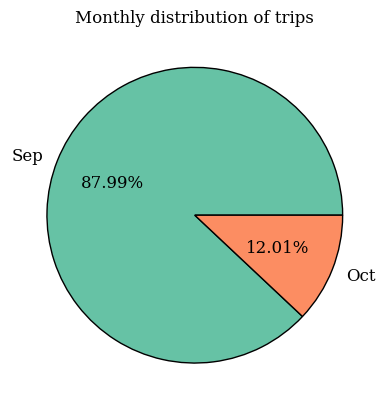

In [148]:
colors = sns.color_palette("Set2")
plt.pie (x= df_month['trip_uuid'],
         labels = ['Sep', 'Oct'],
         colors=colors, 
         autopct = '%.2f%%', 
         wedgeprops = {"edgecolor" : "black", "linewidth": 1, "antialiased": True},
         textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Monthly distribution of trips',fontdict={'fontfamily':'serif'})
plt.plot()


In [149]:
df['trip_creation_day'].unique()

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30,  1,  2,  3], dtype=int8)

Analysis of trip creation based on days

In [150]:
df_day = df.groupby(by = 'trip_creation_day')['trip_uuid'].count().to_frame().reset_index()
df_day['percent'] = np.round(df_day['trip_uuid'] * 100/ df_day['trip_uuid'].sum(), 2)
df_day

,trip_creation_day,trip_uuid,percent
0,1,600,4.06
1,2,549,3.71
2,3,627,4.24
3,12,747,5.05
4,13,750,5.07
5,14,712,4.82
6,15,783,5.30
7,16,616,4.17
8,17,722,4.88
9,18,791,5.35


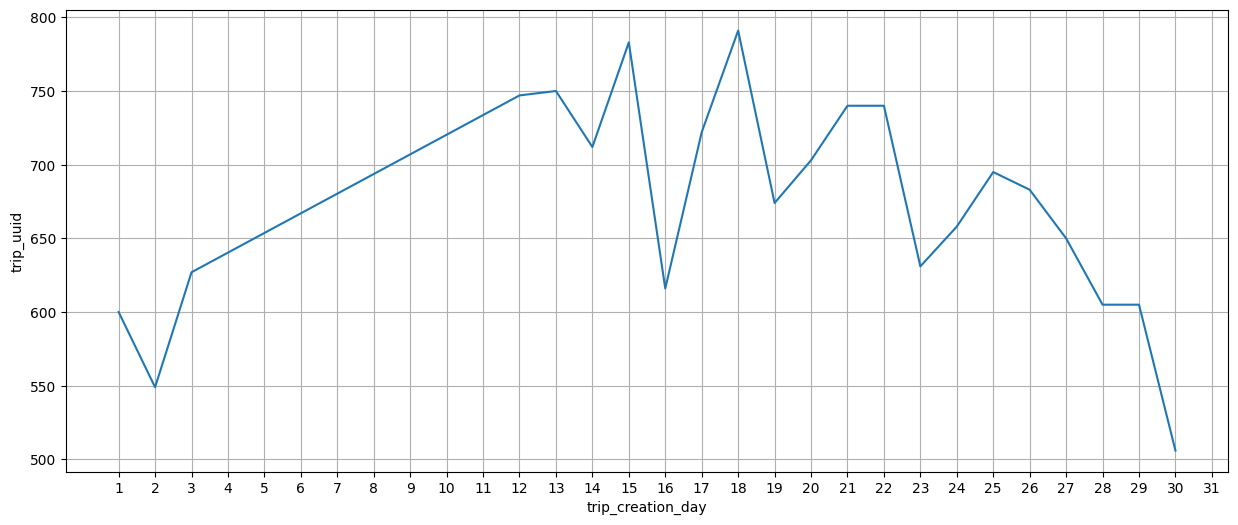

In [151]:
plt.figure(figsize = (15, 6))
sns.lineplot(data = df_day, 
             x = df_day['trip_creation_day'], 
             y = df_day['trip_uuid'], 
             markers = 'o')
plt.xticks(np.arange(1, 32))
plt.grid('both')
plt.show()

- From the above graph we can observe that most trips were created between 10th and 22nd days of the months.

Analysis for trip creation on hourly basis

In [152]:
df['trip_creation_hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int8)

In [153]:
df_hour = df.groupby(by = 'trip_creation_hour')['trip_uuid'].count().to_frame().reset_index()
df_hour['percent'] = np.round(df_hour['trip_uuid'] * 100/ df_hour['trip_uuid'].sum(), 2)
df_hour

,trip_creation_hour,trip_uuid,percent
0,0,991,6.70
1,1,748,5.06
2,2,702,4.75
3,3,651,4.40
4,4,635,4.29
5,5,505,3.42
6,6,610,4.13
7,7,472,3.19
8,8,345,2.33
9,9,317,2.14


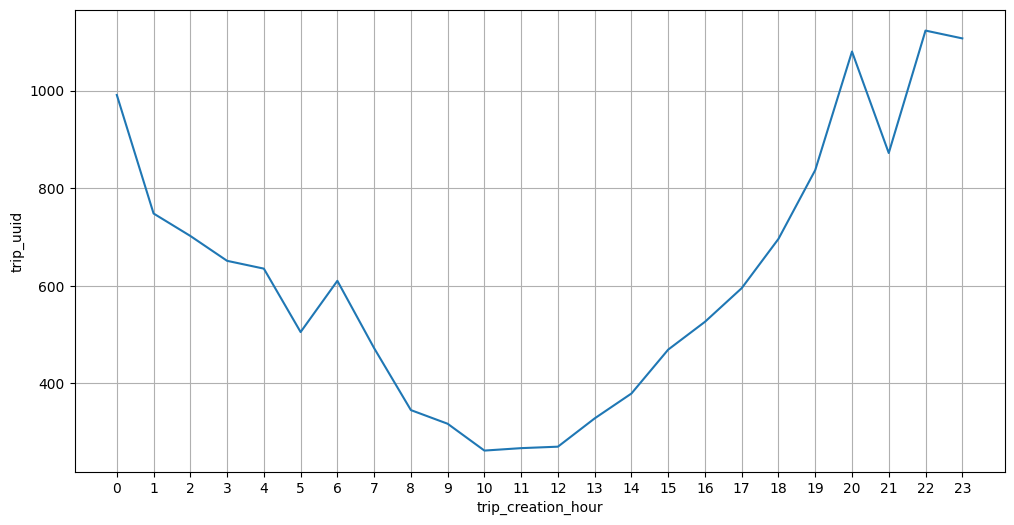

In [154]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df_hour, 
             x = df_hour['trip_creation_hour'], 
             y = df_hour['trip_uuid'], 
             markers = '*')
plt.xticks(np.arange(0,24))
plt.grid('both')
plt.show()

- From the above plot it can be inferred that more number of trips are created after noon peaking at 10 p.m, then decreases steadily.

Analysis for types of routes for the orders.

In [155]:
df_route = df.groupby(by = 'route_type')['trip_uuid'].count().to_frame().reset_index()
df_route['perc'] = np.round(df_route['trip_uuid'] * 100/ df_route['trip_uuid'].sum(), 2)
df_route

,route_type,trip_uuid,perc
0,Carting,8906,60.23
1,FTL,5881,39.77


[]

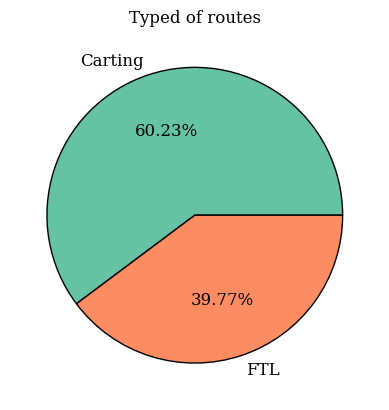

In [156]:
colors = sns.color_palette("Set2")
plt.pie (x= df_route['trip_uuid'],
         labels = ['Carting', 'FTL'],
         colors=colors, 
         autopct = '%.2f%%', 
         wedgeprops = {"edgecolor" : "black", "linewidth": 1, "antialiased": True},
         textprops = {'fontsize' : 12, 'fontfamily' : 'serif', 'fontweight' : 100})
plt.title('Typed of routes',fontdict={'fontfamily':'serif'})
plt.plot()

### State-wise distribution of the trips

Analysis of trips originating from states

In [161]:
df_source_state = df.groupby(by = 'source_state')['trip_uuid'].count().to_frame()
df_source_state['perc'] = np.round(df_source_state['trip_uuid'] * 100/ df_source_state['trip_uuid'].sum(), 2)
df_source_state = df_source_state.sort_values(by = 'trip_uuid', ascending = False).reset_index()
df_source_state.head(10)

,source_state,trip_uuid,perc
0,Maharashtra,2714,18.35
1,Karnataka,2143,14.49
2,Haryana,1823,12.33
3,Tamil Nadu,1039,7.03
4,Telangana,784,5.30
5,Uttar Pradesh,760,5.14
6,Gujarat,750,5.07
7,Delhi,725,4.90
8,West Bengal,665,4.50
9,Punjab,536,3.62


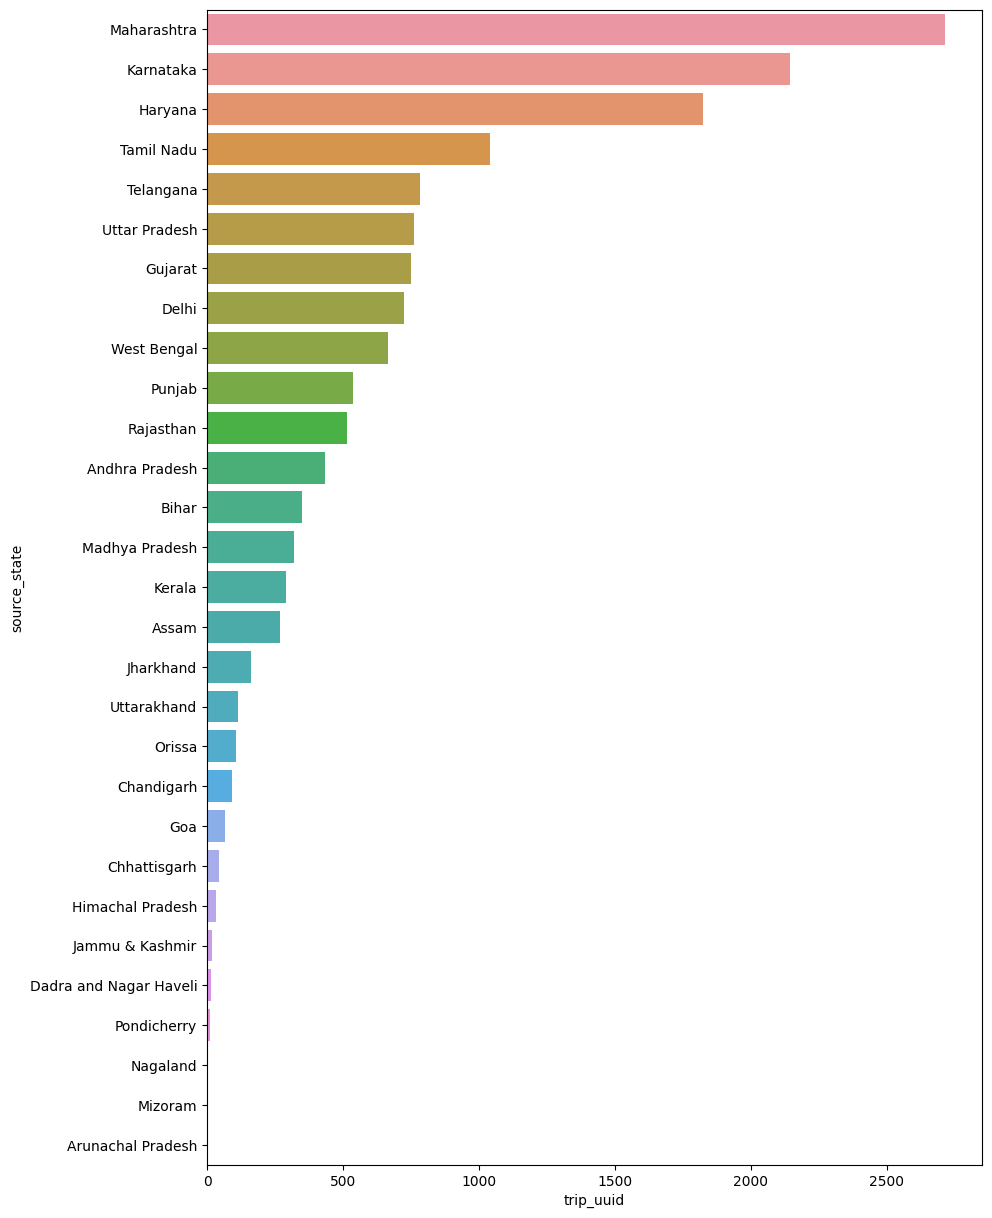

In [165]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_source_state, 
            x = df_source_state['trip_uuid'], 
            y = df_source_state['source_state'],)
plt.show()

- From the above graph we can observe that the top 3 states where maximum trips are created are Maharashtra, Karnataka and Haryana respectively.

Analysis of trip destinations in states

In [168]:
df_destination_state = df.groupby(by = 'destination_state')['trip_uuid'].count().to_frame()
df_destination_state['perc'] = np.round(df_destination_state['trip_uuid'] * 100/ df_destination_state['trip_uuid'].sum(), 2)
df_destination_state = df_destination_state.sort_values(by = 'trip_uuid', ascending = False).reset_index()
df_destination_state

,destination_state,trip_uuid,perc
0,Maharashtra,2561,17.32
1,Karnataka,2294,15.51
2,Haryana,1640,11.09
3,Tamil Nadu,1084,7.33
4,Uttar Pradesh,805,5.44
5,Telangana,784,5.30
6,Gujarat,734,4.96
7,West Bengal,697,4.71
8,Delhi,657,4.44
9,Punjab,617,4.17


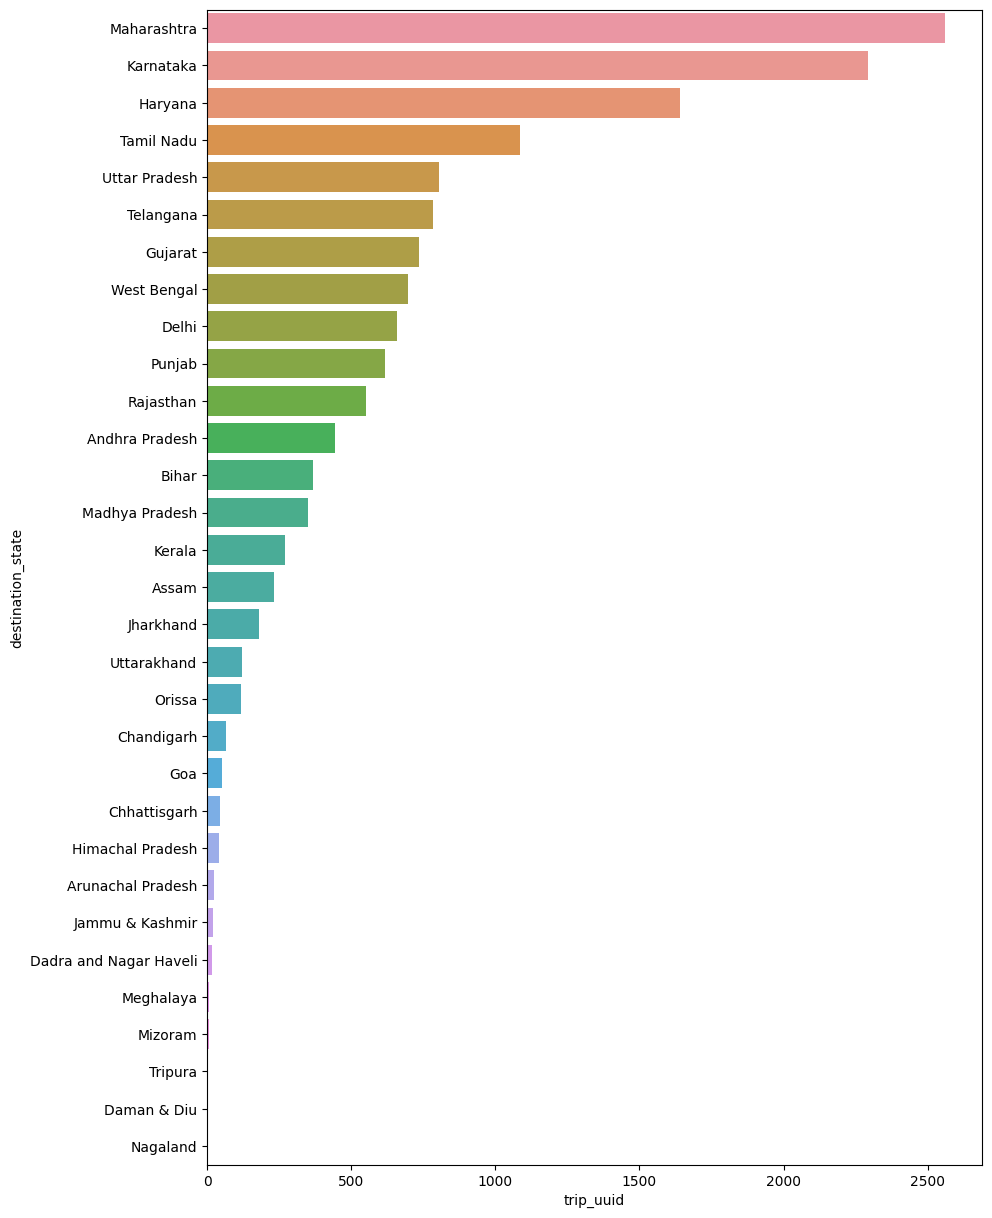

In [164]:
plt.figure(figsize = (10, 15))
sns.barplot(data = df_destination_state, 
            x = df_destination_state['trip_uuid'], 
            y = df_destination_state['destination_state'])
plt.show()

- Maximum trips are being made to Maharashtra, followed by Karnataka and Haryana

#### City-wise analysis

Analysis of city-wise origin of trips

In [159]:
df_city = df.groupby(by = 'source_city')['trip_uuid'].count().to_frame()
df_city['perc'] = np.round(df_city['trip_uuid'] * 100/ df_city['trip_uuid'].sum(), 2)
df_city = df_city.sort_values(by = 'trip_uuid', ascending = False).reset_index()[:20]
df_city

,source_city,trip_uuid,perc
0,Mumbai,1442,9.75
1,Bengaluru,1374,9.29
2,Gurgaon,1154,7.80
3,Delhi,880,5.95
4,Bhiwandi,697,4.71
5,Chennai,568,3.84
6,Hyderabad,524,3.54
7,Pune,480,3.25
8,Kolkata,356,2.41
9,Sonipat,275,1.86


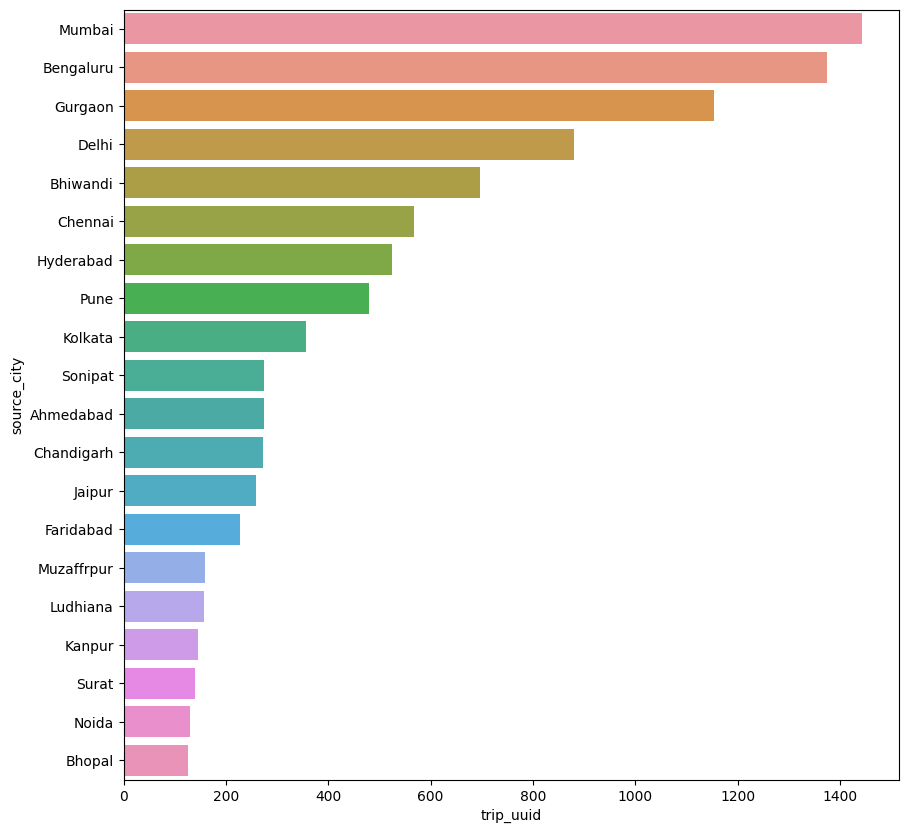

In [160]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_city, 
            x = df_city['trip_uuid'], 
            y = df_city['source_city'])
plt.show()

- From the above graph we can observe the top 20 cities where maximum orders originate from. About 9.5% orders originate from Mumbai, followed by citites like Bengaluru, Gurgaon, Delhi, Bhiwandi, etc.

Analysis of city-wise destination of trips

In [169]:
df_destination_city = df.groupby(by = 'destination_city')['trip_uuid'].count().to_frame()
df_destination_city['perc'] = np.round(df_destination_city['trip_uuid'] * 100/ df_destination_city['trip_uuid'].sum(), 2)
df_destination_city = df_destination_city.sort_values(by = 'trip_uuid', ascending = False).reset_index()[:20]
df_destination_city

,destination_city,trip_uuid,perc
0,Mumbai,1548,10.47
1,Bengaluru,1525,10.31
2,Gurgaon,936,6.33
3,Delhi,783,5.30
4,Chennai,595,4.02
5,Hyderabad,503,3.40
6,Bhiwandi,434,2.94
7,Kolkata,384,2.60
8,Chandigarh,339,2.29
9,Sonipat,322,2.18


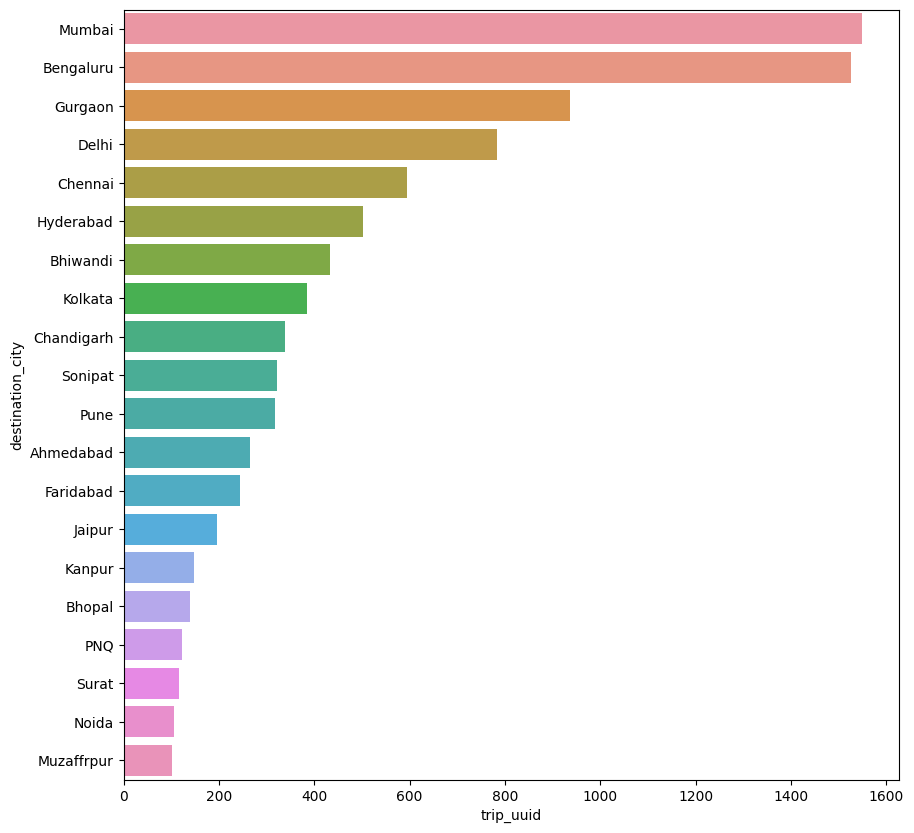

In [170]:
plt.figure(figsize = (10, 10))
sns.barplot(data = df_destination_city, 
            x = df_destination_city['trip_uuid'], 
            y = df_destination_city['destination_city'])
plt.show()

- Maximum number of trips end in Mumbai (10.47%) and Bengaluru (10.31%) followed by Gurgaon, Delhi and Chennai.

Boxplot and Outlier Detection for numerical fields

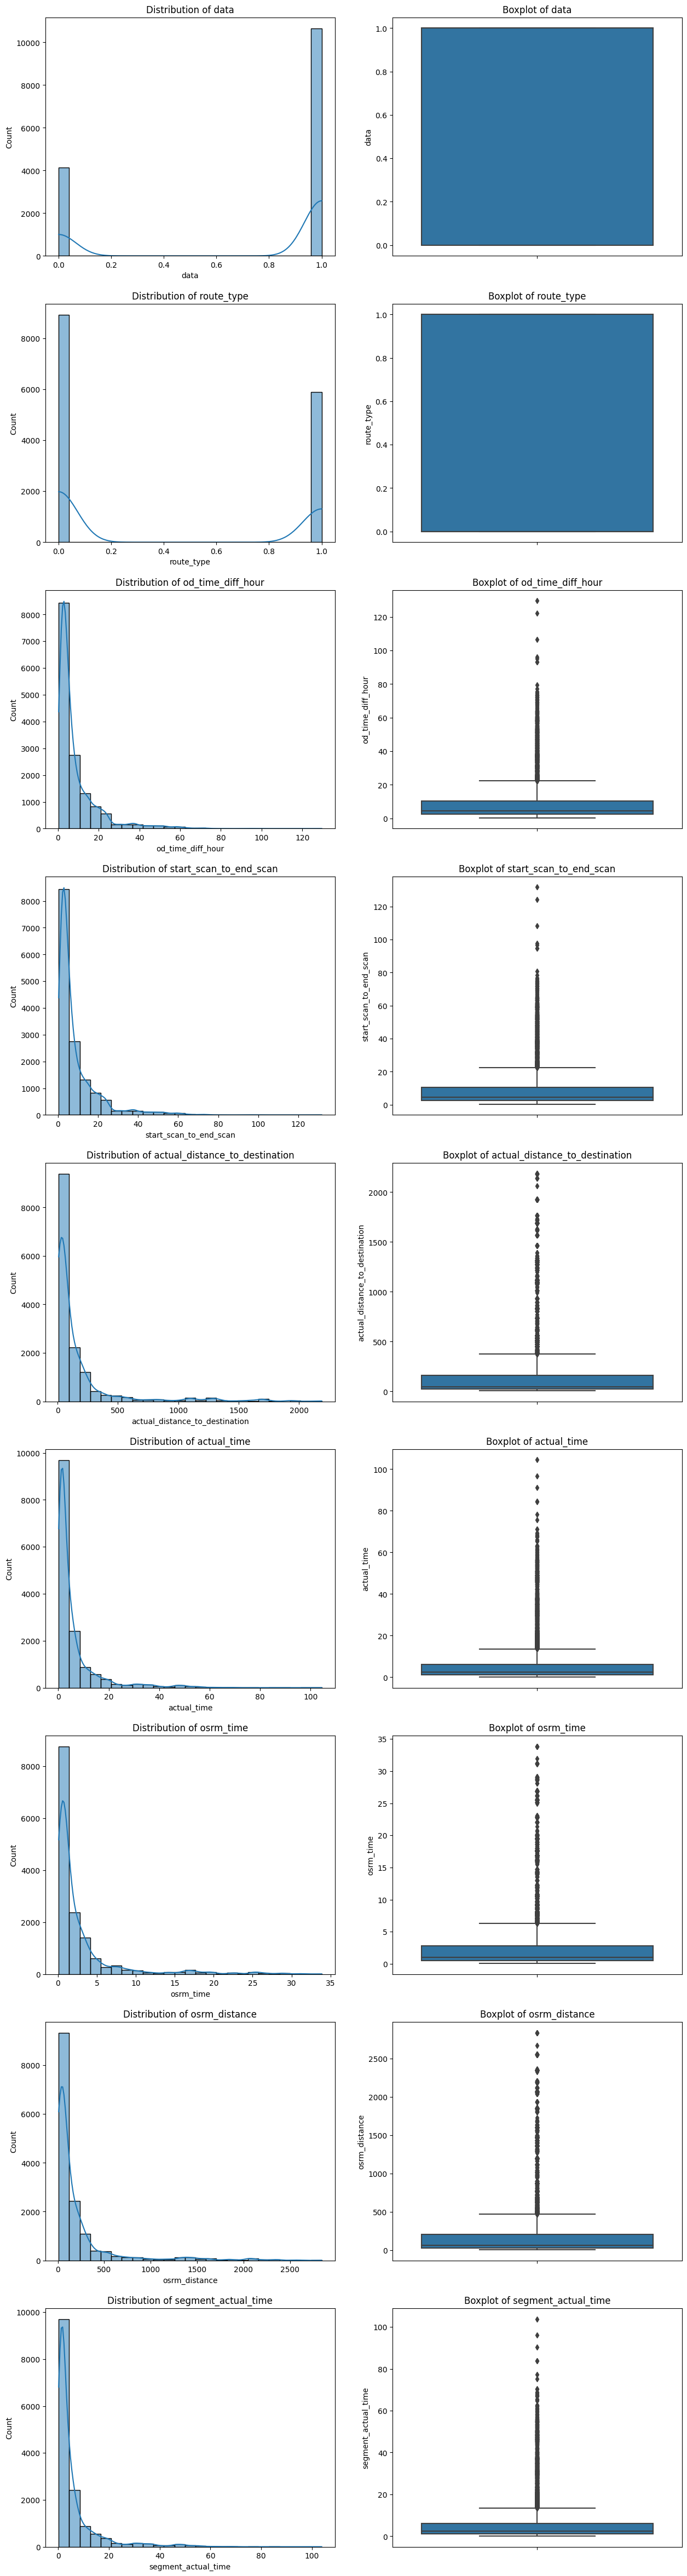

In [251]:
num_vars = df.select_dtypes(include=np.number).columns.tolist()

fig, ax = plt.subplots(nrows=9, ncols=2, figsize=(15, 60))

for i in range(0,9):
    
    sns.histplot(x=df[num_vars[i]], kde=True, bins = 25, ax=ax[i, 0])
    ax[i, 0].set_title(f"Distribution of {num_vars[i]}")
    
    sns.boxplot(y = df[num_vars[i]], ax=ax[i, 1], data=df)
    ax[i, 1].set_title(f"Boxplot of {num_vars[i]}")
    
plt.show()

In [181]:
numerical_columns = ['od_time_diff_hour', 'start_scan_to_end_scan', 'actual_distance_to_destination',
                    'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
                    'segment_osrm_time', 'segment_osrm_distance']
df_corr = df[numerical_columns].corr()
df_corr

,od_time_diff_hour,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
od_time_diff_hour,1.000000,0.999999,0.919072,0.961559,0.927414,0.925125,0.961582,0.919357,0.920098
start_scan_to_end_scan,0.999999,1.000000,0.919159,0.961612,0.927471,0.925205,0.961634,0.919429,0.920191
actual_distance_to_destination,0.919072,0.919159,1.000000,0.953920,0.993568,0.997268,0.952987,0.987542,0.993068
actual_time,0.961559,0.961612,0.953920,1.000000,0.958781,0.959398,0.999989,0.954044,0.957151
osrm_time,0.927414,0.927471,0.993568,0.958781,1.000000,0.997588,0.957955,0.993263,0.991624
osrm_distance,0.925125,0.925205,0.997268,0.959398,0.997588,1.000000,0.958540,0.991802,0.994712
segment_actual_time,0.961582,0.961634,0.952987,0.999989,0.957955,0.958540,1.000000,0.953214,0.956293
segment_osrm_time,0.919357,0.919429,0.987542,0.954044,0.993263,0.991802,0.953214,1.000000,0.996098
segment_osrm_distance,0.920098,0.920191,0.993068,0.957151,0.991624,0.994712,0.956293,0.996098,1.000000


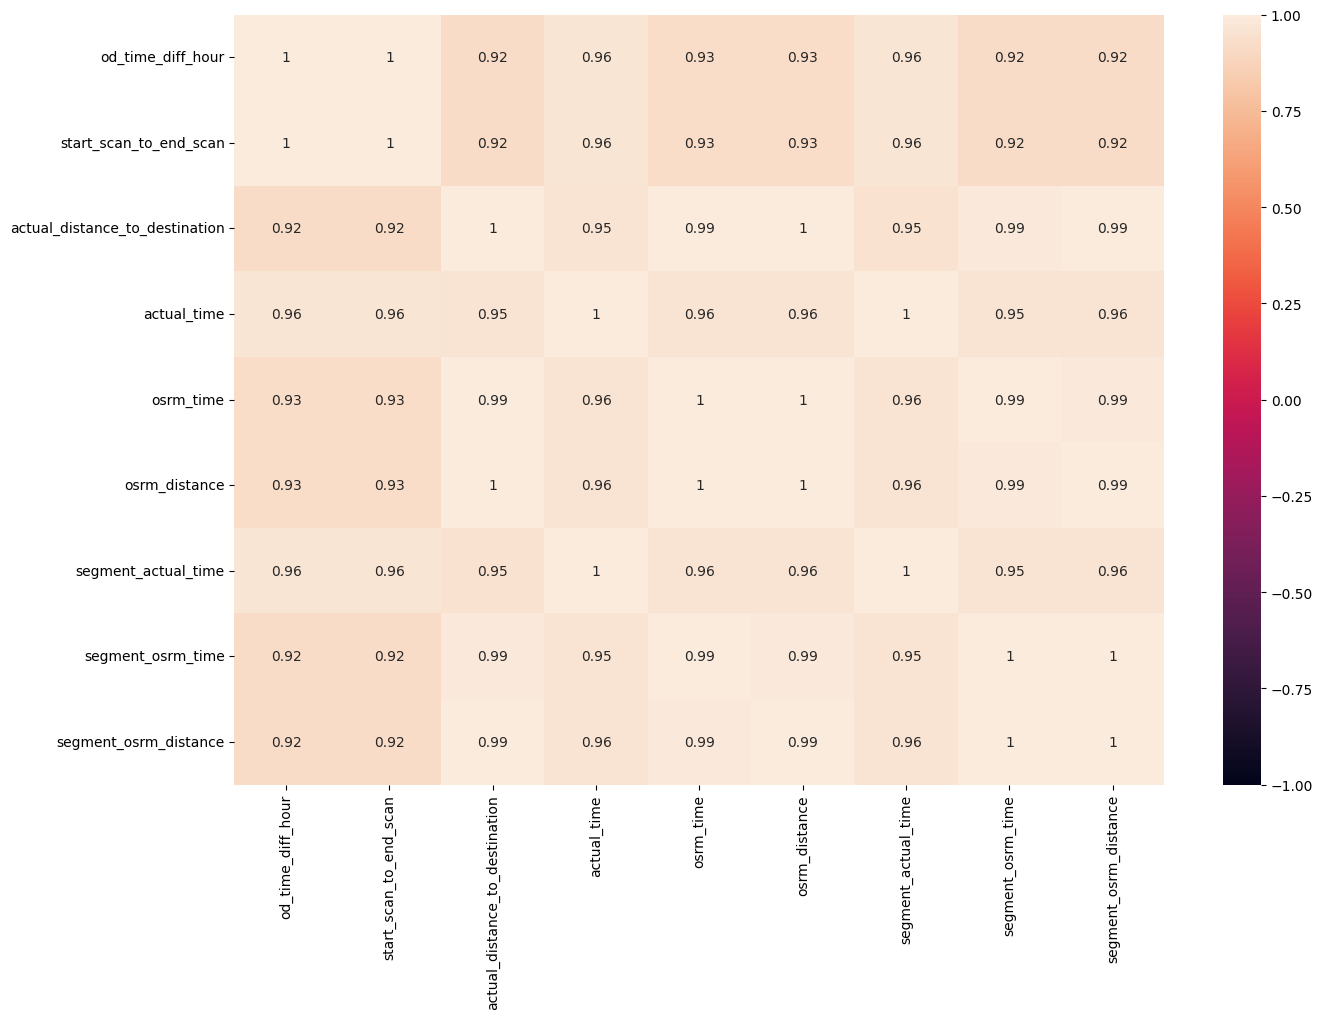

In [183]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_corr, vmin = -1, vmax = 1, annot = True)
plt.show()

- We can observe that all the numerical columns specified are highly correlated to each other.

### In-depth analysis

- #### Compare the difference between od_time_diff_hour and start_scan_to_end_scan. 

  * **Null Hypothesis ( $H_0$ )** - od_total_time (Total Trip Time) and  start_scan_to_end_scan (Expected total trip time) are same.

  * **Alternate Hypothesis ( $H_A$ )** - od_total_time (Total Trip Time) and  start_scan_to_end_scan (Expected total trip time) are different.

  * Let **alpha** == 0.05

In [184]:
df[['od_time_diff_hour', 'start_scan_to_end_scan']].describe()

,od_time_diff_hour,start_scan_to_end_scan
count,14787.000000,14787.000000
mean,8.693697,8.823817
std,10.793722,10.970916
min,0.380000,0.383333
25%,2.450000,2.483333
50%,4.580000,4.650000
75%,10.385000,10.533333
max,129.480000,131.633333


Visual test to see if samples are normally distributed

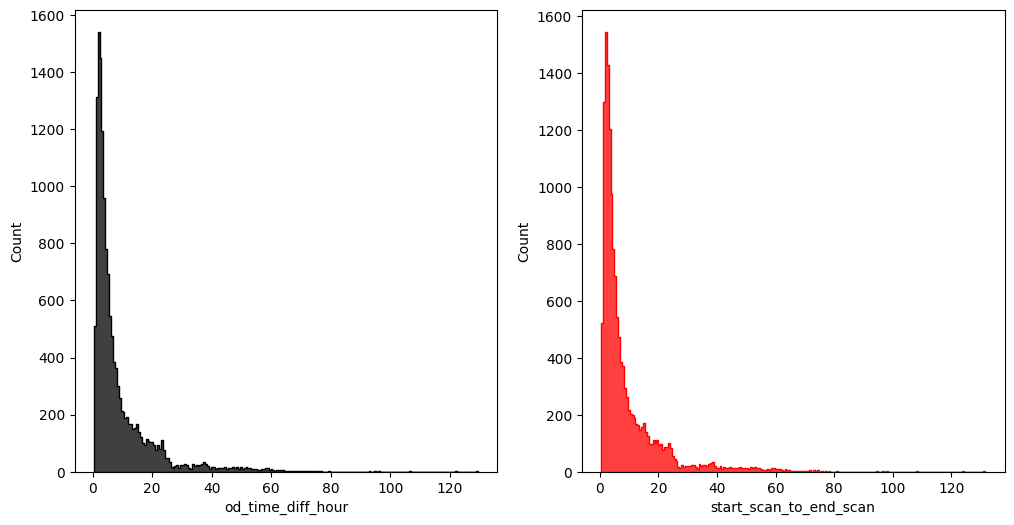

In [192]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
sns.histplot(df['od_time_diff_hour'], element = 'step', color = 'black')
plt.subplot(122)
sns.histplot(df['start_scan_to_end_scan'], element = 'step', color = 'red')

plt.show()

Checking the distribution using QQ plot

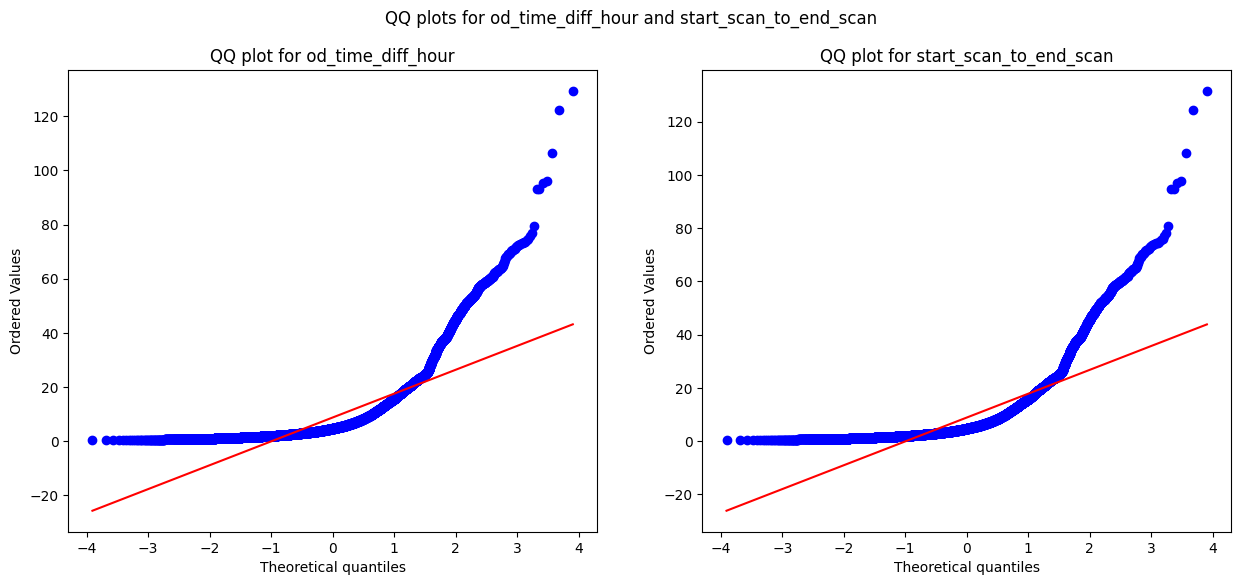

In [198]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for od_time_diff_hour and start_scan_to_end_scan')
spy.probplot(df['od_time_diff_hour'], plot = plt, dist = 'norm')
plt.title('QQ plot for od_time_diff_hour')
plt.subplot(1, 2, 2)
spy.probplot(df['start_scan_to_end_scan'], plot = plt, dist = 'norm')
plt.title('QQ plot for start_scan_to_end_scan')
plt.show()

From the above plots we can infer that the samples are not normally distributed

Using Levene's test to check homogenity of variances.

In [200]:
test_stat, p_value = spy.levene(df['od_time_diff_hour'], df['start_scan_to_end_scan'])
print('p-value =', p_value)
if p_value < 0.05:
    print('The samples do not have a Homogenous Variance')
else:
    print('The samples have a Homogenous Variance ') 

p-value = 0.39149099988173863
The samples have a Homogenous Variance 


Using Mann-Whitney U rank test 

In [202]:
test_stat, p_value = spy.mannwhitneyu(df['od_time_diff_hour'], df['start_scan_to_end_scan'])
print('P-value :',p_value)

P-value : 0.25500413572708247


Since p-value is greater than alpha, we **accept $H_0$**.

#### Do hypothesis testing / visual analysis between actual_time aggregated value and OSRM time aggregated value 

* **Null Hypothesis ( $H_0$ )** - The sample follows normal distribution
* **Alternate Hypothesis ( $H_A$ )** - The sample does not follow normal distribution

* Let **alpha** == 0.05

In [204]:
df[['actual_time', 'osrm_time']].describe()

,actual_time,osrm_time
count,14787.000000,14787.000000
mean,5.938434,2.683182
std,9.358632,4.524325
min,0.150000,0.100000
25%,1.116667,0.483333
50%,2.466667,1.000000
75%,6.116667,2.800000
max,104.416667,33.866667


[]

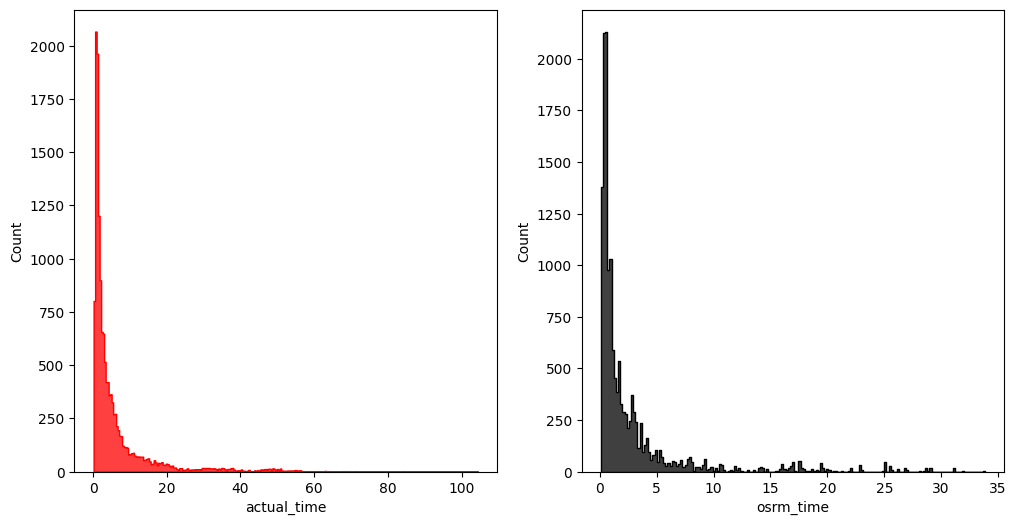

In [205]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
sns.histplot(df['actual_time'], element = 'step', color = 'red')
plt.subplot(122)
sns.histplot(df['osrm_time'], element = 'step', color = 'black')

plt.plot()

[]

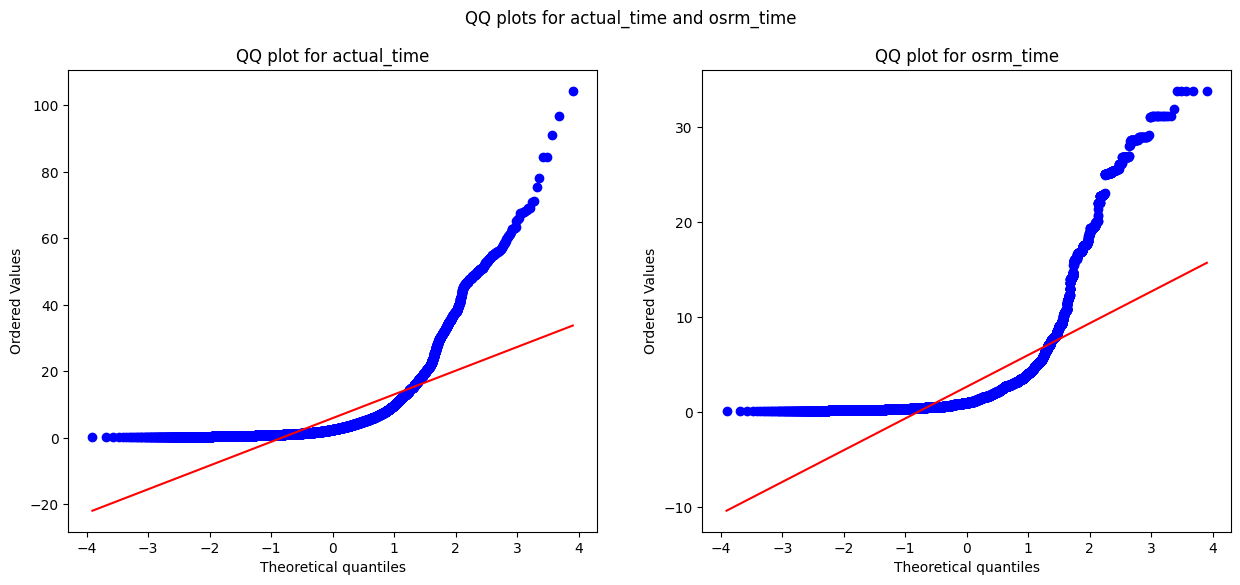

In [206]:
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.suptitle('QQ plots for actual_time and osrm_time')
spy.probplot(df['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(122)
spy.probplot(df['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.plot()

We can observe that the above plots do not follow normal distribution

In [208]:
test_stat, p_value = spy.levene(df['actual_time'], df['osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 8.743536461316657e-219
The samples do not have  Homogenous Variance


In [209]:
test_stat, p_value = spy.mannwhitneyu(df['actual_time'], df['osrm_time'])
print('p-value = ', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value =  0.0
The samples are not similar


Since p-value is less than alpha, *$H_0$ is rejected*.  

#### Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

* **Null Hypothesis ( $H_0$ )** - The samples are similar
* **Alternate Hypothesis ( $H_A$ )** - The samples are not similar

* Let **alpha** == 0.05

In [211]:
df[['actual_time', 'segment_actual_time']].describe()

,actual_time,segment_actual_time
count,14787.000000,14787.000000
mean,5.938434,5.884320
std,9.358632,9.272765
min,0.150000,0.150000
25%,1.116667,1.100000
50%,2.466667,2.450000
75%,6.116667,6.066667
max,104.416667,103.833333


[]

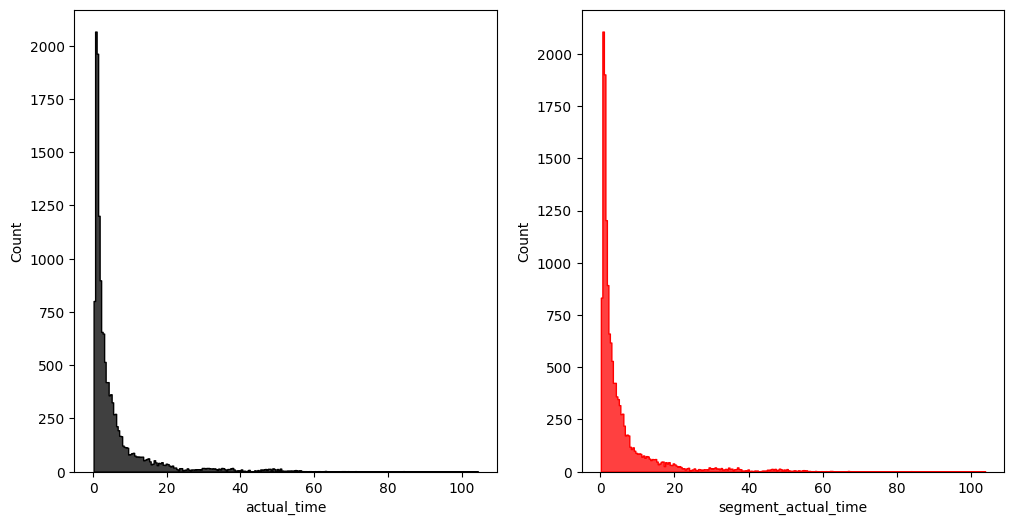

In [212]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
sns.histplot(df['actual_time'], element = 'step', color = 'black')
plt.subplot(122)
sns.histplot(df['segment_actual_time'], element = 'step', color = 'red')
plt.plot()

[]

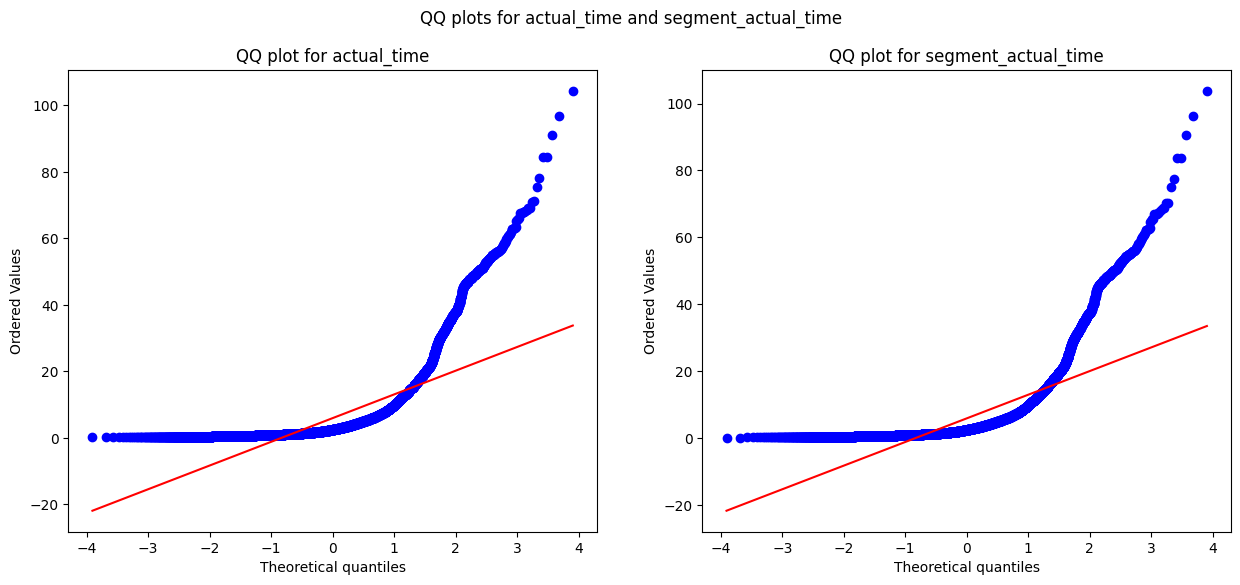

In [214]:
plt.figure(figsize = (15, 6))
plt.subplot(121)
plt.suptitle('QQ plots for actual_time and segment_actual_time')
spy.probplot(df['actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for actual_time')
plt.subplot(122)
spy.probplot(df['segment_actual_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_actual_time')
plt.plot()

From the above plots we can infer that the samples do not follow normal distribution

In [215]:
test_stat, p_value = spy.levene(df['actual_time'], df['segment_actual_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 0.6962681452003545
The samples have Homogenous Variance 


In [216]:
test_stat, p_value = spy.mannwhitneyu(df['actual_time'], df['segment_actual_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.41578601931625214
The samples are similar 


Since p-value > alpha, we *accept $H_0$*

#### Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

* **Null Hypothesis ( $H_0$ )** - The samples are similar
* **Alternate Hypothesis ( $H_A$ )** - The samples are not similar

* Let **alpha** == 0.05

In [218]:
df[['osrm_time', 'segment_osrm_time']].describe()

,osrm_time,segment_osrm_time
count,14787.000000,14787.000000
mean,2.683182,3.008527
std,4.524325,5.244655
min,0.100000,0.100000
25%,0.483333,0.500000
50%,1.000000,1.083333
75%,2.800000,3.066667
max,33.866667,42.733333


[]

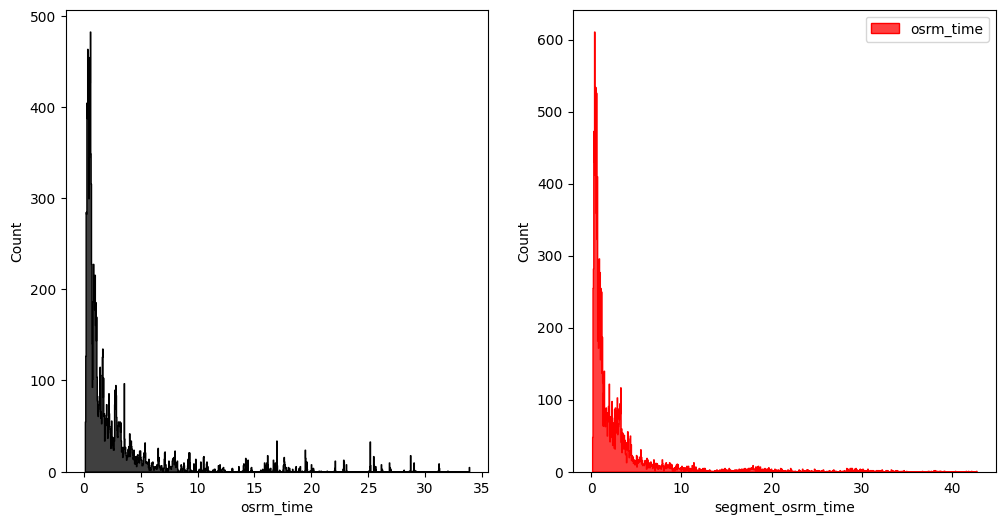

In [219]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
sns.histplot(df['osrm_time'], element = 'step', color = 'black', bins = 1000)
plt.subplot(122)
sns.histplot(df['segment_osrm_time'], element = 'step', color = 'red', bins = 1000)
plt.legend(['osrm_time', 'segment_osrm_time'])
plt.plot()

[]

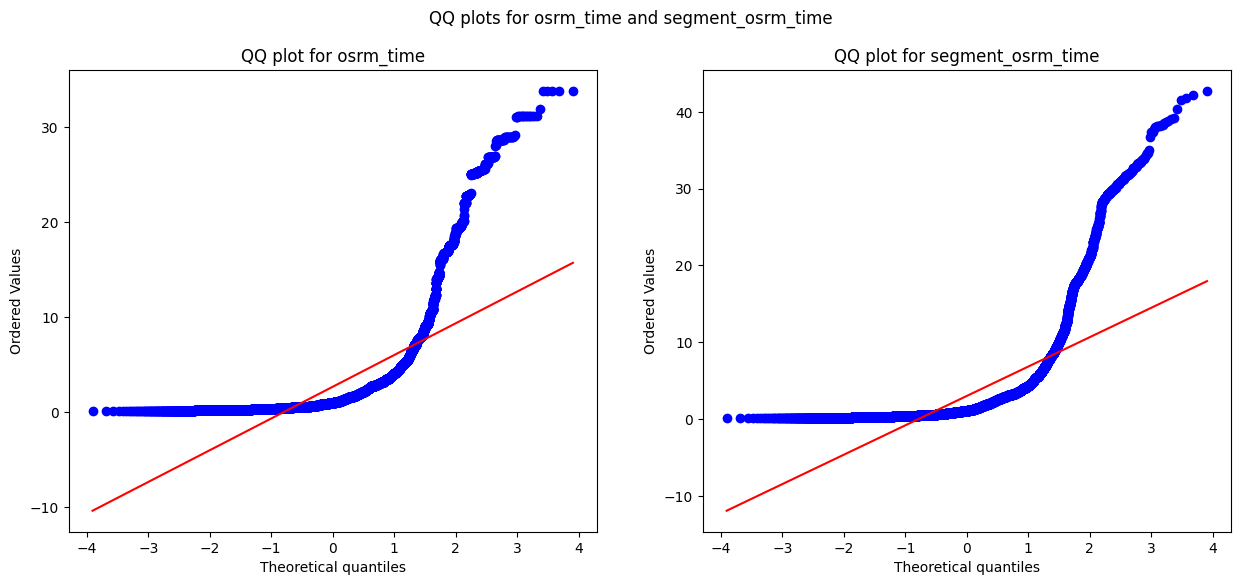

In [220]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for osrm_time and segment_osrm_time')
spy.probplot(df['osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for osrm_time')
plt.subplot(1, 2, 2)
spy.probplot(df['segment_osrm_time'], plot = plt, dist = 'norm')
plt.title('QQ plot for segment_osrm_time')
plt.plot()

It can be seen from the above plots that the samples do not come from normal distribution.

In [221]:
test_stat, p_value = spy.levene(df['osrm_time'], df['segment_osrm_time'])
print('p-value', p_value)

if p_value < 0.05:
    print('The samples do not have Homogenous Variance')
else:
    print('The samples have Homogenous Variance ') 

p-value 9.250556006347759e-08
The samples do not have Homogenous Variance


In [222]:
test_stat, p_value = spy.mannwhitneyu(df['osrm_time'], df['segment_osrm_time'])
print('p-value', p_value)
if p_value < 0.05:
    print('The samples are not similar')
else:
    print('The samples are similar ') 

p-value 2.4893531591323577e-08
The samples are not similar


Since p-value < alpha, we *reject $H_0$*

#### Insights

- The data spans from '2018-09-12 00:00:16' to '2018-10-08 03:00:24'.
- There are approximately 14,787 unique trip IDs, 837 unique source centers, 963 unique destination centers, 686 unique source cities, and 804 unique destination cities.
- The most prevalent route type is Carting.
- The number of trips starts to rise after noon, reaching its peak at 10 P.M., and then gradually decreases.
- The primary sources of orders are states such as Maharashtra, Karnataka, Haryana, Tamil Nadu, and Telangana.
- The highest number of trips originate from Mumbai, followed by Gurgaon, Delhi, Bengaluru, and Bhiwandi, suggesting a strong seller presence in these cities.
- The most common destination cities for orders are Bengaluru, Mumbai, Gurgaon, Bangalore, and Delhi.
- The features "start_scan_to_end_scan" and "od_total_time" (created feature) exhibit statistical similarity.
- The features "actual_time" and "osrm_time" show statistical differences.
- The features "start_scan_to_end_scan" and "segment_actual_time" are statistically similar.
- The features "osrm_distance" and "segment_osrm_distance" differ statistically from each other.

### Recommendations

- A significant portion of orders originates from or is delivered to states such as Maharashtra, Karnataka, Haryana, and Tamil Nadu. To further improve market penetration in these regions, existing corridors should be refined and expanded.

- Conducting customer profiling for individuals in states like Maharashtra, Karnataka, Haryana, Tamil Nadu, and Uttar Pradesh is essential. Understanding why a major portion of orders comes from these states will help in enhancing the overall buying and delivery experience for customers in these regions.

- Examining states from the perspective of traffic conditions and terrain can offer valuable insights. This information can serve as a useful indicator for planning and addressing demand, especially during peak festival seasons.

- Enhancements are required in the OSRM trip planning system to address discrepancies, particularly for transporters. If the routing engine is configured for optimal results, it can significantly improve the overall efficiency of the system.

- Notably, there exists a difference between "osrm_time" and "actual_time." To enhance delivery time predictions and provide customers with more accurate estimates, the team should work towards minimizing this difference. This will contribute to a more convenient experience for customers who expect precise delivery times.